In [1]:
# first neural network with keras tutorial
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

import numpy as np
import pandas as pd
import os
import PIL
import PIL.Image
import tensorflow as tf

#from sklearn.model_selection import train_test_split

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    'data/',
    validation_split=0.2,
    subset="training",
    image_size=(28, 28),
    seed=132,
    batch_size=32
)

Found 10000 files belonging to 10 classes.
Using 8000 files for training.


In [3]:
# let's separate train_ds into X_train and y_train

X_train = []
y_train = []

for images, labels in train_ds:
    for image in images:
        X_train.append(image)
    for label in labels:
        y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [4]:
val_ds = keras.utils.image_dataset_from_directory(
    'val_data',
    validation_split=0.2,
    subset="validation",
    image_size=(28, 28),
    seed=132,
    batch_size=32
)

Found 10000 files belonging to 10 classes.
Using 2000 files for validation.


In [5]:
# checking class names

print(train_ds.class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [6]:
# checking shape of data

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 28, 28, 3)
(32,)


In [7]:
# import tensorflow as tf
# from tensorflow.keras.layers.experimental import preprocessing

# # Assume `x_train` and `y_train` are your training images and labels

# # Define the data augmentation
# data_augmentation = tf.keras.Sequential([
#   preprocessing.Rescaling(1./255),
#   preprocessing.RandomRotation(0.1),
#   preprocessing.RandomContrast(0.5),
# ])

# # Create empty lists to hold the augmented images and labels
# x_train_augmented = []
# y_train_augmented = []

# # For each image in the training set
# for x, y in zip(train_X, train_y):
#     # Create 5 augmented versions of the image
#     for _ in range(2):
#         augmented_image = data_augmentation(tf.expand_dims(x, 0), training=True)
#         x_train_augmented.append(tf.squeeze(augmented_image).numpy())
#         y_train_augmented.append(y)

# # Convert the lists to numpy arrays
# x_train_augmented = np.array(x_train_augmented)
# y_train_augmented = np.array(y_train_augmented)

In [8]:
# configure for performance

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
# standardize layer

normalization_layer = tf.keras.layers.Rescaling(1./255)

augmentation = tf.keras.Sequential([
    keras.layers.RandomBrightness(0.1),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomContrast(0.1),
])

In [10]:
# building our model

model = tf.keras.Sequential([
  # augmentation,
  normalization_layer,

  keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
  keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.Dropout(0.2),

  keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
  keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.Dropout(0.2),  

  tf.keras.layers.Flatten(),
  keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile (
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
all_callbacks = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

In [13]:
model.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[all_callbacks],
    epochs=100
)

Epoch 1/100
250/250 [==============================] - 3s 9ms/step - loss: 0.9704 - accuracy: 0.6654 - val_loss: 0.2673 - val_accuracy: 0.9190
Epoch 2/100
250/250 [==============================] - 2s 9ms/step - loss: 0.2688 - accuracy: 0.9154 - val_loss: 0.1602 - val_accuracy: 0.9475
Epoch 3/100
250/250 [==============================] - 2s 9ms/step - loss: 0.1828 - accuracy: 0.9391 - val_loss: 0.1124 - val_accuracy: 0.9660
Epoch 4/100
250/250 [==============================] - 2s 10ms/step - loss: 0.1454 - accuracy: 0.9531 - val_loss: 0.1050 - val_accuracy: 0.9660
Epoch 5/100
250/250 [==============================] - 2s 9ms/step - loss: 0.1240 - accuracy: 0.9610 - val_loss: 0.0895 - val_accuracy: 0.9715
Epoch 6/100
250/250 [==============================] - 2s 9ms/step - loss: 0.1040 - accuracy: 0.9650 - val_loss: 0.0897 - val_accuracy: 0.9720
Epoch 7/100
250/250 [==============================] - 2s 9ms/step - loss: 0.0951 - accuracy: 0.9681 - val_loss: 0.1036 - val_accuracy: 0.969

In [14]:
# let's evaluate our model

# and load the test data real quick
test_ds = keras.utils.image_dataset_from_directory(
    'pure_data/colorized-MNIST/testing/',
    image_size=(28, 28),
    seed=132,
    batch_size=32
)

test_acc = model.evaluate(test_ds, verbose=2)

print('\nTest accuracy:', test_acc)

Found 10000 files belonging to 10 classes.
313/313 - 1s - loss: 0.0161 - accuracy: 0.9965 - 1s/epoch - 4ms/step

Test accuracy: [0.01608314737677574, 0.9965000152587891]


In [15]:
# VGG 16 - no standardization, no augmentation - 97.2% accuracy
# Somehow achieved 99.7% accuracy on test set, which i didn't expect, investigating...
# Now 99.91 which feels sorta impossible. Investigating...

# Found later that my accuracy code was incorrect. Is fixed now.

# Control : 99.6%
# Light blurring : 99.4%
# Heavy blurring : 94.7%
# Mega-Ultra blurring : 44.4%



In [16]:
# let's split our test data into X_test and y_test

X_test = []
y_test = []

for images, labels in test_ds:
    for image in images:
        X_test.append(image)
    for label in labels:
        y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

313/313 [==============================] - 1s 3ms/step


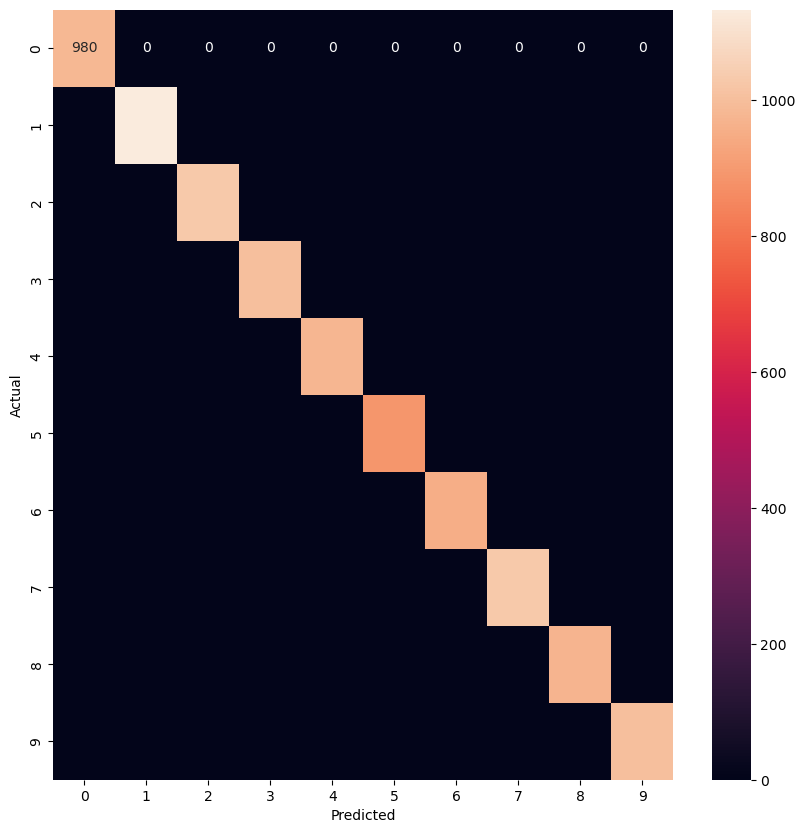

In [17]:
# let's create a confusion matrix with our test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)

# let's plot our confusion matrix

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()